In [2]:
import pandas as pd
# Primer paso, importado de los datos

datos = pd.read_csv("Datos/datos.csv")

In [3]:
datos.head(2)

,nom,edad,sex,rel_ctxo_rel_mala,rel_ctxo_trauma,rel_ctxo_buena,ed_perm,ed_norm,ed_estr,resil_ba,...,max_min,conc_arb,pseu_res,deb,raz_emo,inhib,asert,agres,impuls,grupo
0,Elena,20,0,1,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
1,Marta,19,0,0,0,1,0,0,1,1,...,1,1,1,1,0,1,0,0,0,2


Eliminación de variables no necesarias: Nombre

In [4]:
datos_mod = datos.iloc[:, -25:-1]

In [5]:
datos_mod.head(2)

,edad,sex,rel_ctxo_rel_mala,rel_ctxo_trauma,rel_ctxo_buena,ed_perm,ed_norm,ed_estr,resil_ba,resil_me,...,fil_men,max_min,conc_arb,pseu_res,deb,raz_emo,inhib,asert,agres,impuls
0,20,0,1,0,0,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,1
1,19,0,0,0,1,0,0,1,1,0,...,0,1,1,1,1,0,1,0,0,0


Centrado y escalado de los datos debido a la variable EDAD

In [40]:
from sklearn.preprocessing import scale

In [7]:
datos_ml = scale(datos_mod)

D:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Ahora que están los datos centrados y escalados y con las variables innecesarias eliminadas, se puede pasar a los métodos de machine learning

In [8]:
# Hay que hacer una separación entre datos de train y test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(datos_ml, datos.iloc[:, 25], random_state=97)

Las redes neuronales han sido desarrolladas en R, así como todo el análisis de datos. A continuación desarrollaré el resto de métodos:

                                                                                        KNN

In [10]:
# Se hace una grid para comprobar cuales serán los mejores parámetros

from sklearn.model_selection import GridSearchCV

grid_knn = {
    'n_neighbors' : range(1, 15),
    'metric' : ['euclidean', 'manhattan']
}

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), grid_knn, cv = 3, scoring='accuracy')

In [12]:
knn.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 15), 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [13]:
knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 12}

In [14]:
from sklearn.model_selection import cross_val_score

knn = knn.best_estimator_.fit(x_train, y_train)

puntuacion = knn.score(x_train, y_train)

print("La puntuación máxima conseguida en train es: {:.1f}".format(puntuacion)) 

puntuacion = knn.score(x_test, y_test)

print("La puntuación máxima conseguida en test es: {:.1f}".format(puntuacion)) 

La puntuación máxima conseguida en train es: 0.5
La puntuación máxima conseguida en test es: 0.5


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
print(confusion_matrix(y_test, knn.predict(x_test)))

[[2 1 0 1]
 [1 7 0 0]
 [0 1 0 0]
 [3 1 0 0]]


                                                                                    Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
randomForest_grid = RandomForestClassifier(random_state=97)

grid_rf = { 
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(5, 15),
    'criterion' :['gini', 'entropy']
}

#CV por defecto de 3

randomForest = GridSearchCV(estimator=randomForest_grid, param_grid=grid_rf, cv = 3)

In [18]:
randomForest.fit(x_train, y_train)

randomForest.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [19]:
print(randomForest.best_estimator_)
print("")

randomForest = randomForest.best_estimator_.fit(x_train, y_train)

print("Clasificación Random Forest Grid CV 5")

puntuacion = randomForest.score(x_train, y_train)

print("La puntuación en tanto por 1 de train de: {:.3f}".format(puntuacion))

puntuacion = randomForest.score(x_test, y_test)

print("La puntuación en tanto por 1 de test es de: {:.3f}".format(puntuacion))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=97, verbose=0, warm_start=False)

Clasificación Random Forest Grid CV 5
La puntuación en tanto por 1 de train de: 0.920
La puntuación en tanto por 1 de test es de: 0.471


In [20]:
print(confusion_matrix(y_test, randomForest.predict(x_test)))

[[1 2 0 1]
 [2 6 0 0]
 [0 1 0 0]
 [1 2 0 1]]


                                                                                        SVM

In [18]:
from sklearn import svm

In [30]:
parametros = {
    'kernel':('linear', 'rbf', 'poly'),
    'C':range(1, 10),
    'degree': range(2, 5),
    
}

svc_grid = svm.SVC(random_state=97)
svc_grid = GridSearchCV(svc_grid, parametros, cv=3)
svc_grid.fit(x_train, y_train)
svc_grid.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf'}

In [31]:
print("Clasificación SVM Grid CV 3")

svc_grid = svc_grid.best_estimator_.fit(x_train, y_train)

puntuacion = svc_grid.score(x_train, y_train)

print("La puntuación del train en tanto por 1 es de: {:.3f}".format(puntuacion))

puntuacion = svc_grid.score(x_test, y_test)

print("La puntuación del test en tanto por 1 es de: {:.3f}".format(puntuacion))

Clasificación SVM Grid CV 3
La puntuación del train en tanto por 1 es de: 0.860
La puntuación del test en tanto por 1 es de: 0.412


In [33]:
print(confusion_matrix(y_test, svc_grid.predict(x_test)))

[[1 2 0 1]
 [2 6 0 0]
 [0 1 0 0]
 [1 3 0 0]]


                                                                                            K-Means

In [34]:
from sklearn.cluster import KMeans

In [35]:
# 4 clusters, uno para cada grupo

kmeans = KMeans(n_clusters=4, random_state=97)

kmeans_model = kmeans.fit(x_train, y_train)

In [36]:
prediction_kmeans = kmeans_model.predict(x_test)

kmeans_model.cluster_centers_

array([[-0.73559281,  0.22393804, -0.10066827,  0.50428397, -0.4149716 ,
         1.58943883, -0.98518437, -0.53708616,  0.67175988, -0.64456732,
        -0.12309149,  0.0146385 ,  0.21650635,  0.12347898,  0.26799143,
         0.1754116 ,  0.12309149, -0.61499388, -0.59214434,  0.51395617,
         0.09116072, -0.3939193 ,  0.18260929, -0.22971146],
       [ 0.87158615,  0.18880023,  0.4439408 ,  0.44469486, -0.72929232,
         0.00473047,  0.30067315, -0.3657301 , -1.14470294,  1.18019369,
        -0.12309149, -0.59251076, -0.47425201, -0.73009398, -0.71586752,
        -0.24432331,  0.12309149, -0.15780009,  0.25197632, -0.18880023,
        -0.02918939,  0.23447577, -0.19437404, -0.08313367],
       [ 0.03983879, -0.07990075, -0.22141869, -0.50172044,  0.63220387,
        -0.62915287,  1.01503844, -0.53708616,  0.39869685, -0.37025684,
        -0.12309149,  0.34156503,  0.21650635,  0.58309519,  0.22458589,
         0.1754116 ,  0.12309149,  0.39688354,  0.00370553,  0.22458589,
  

Para hacer plotting, tengo que reducir a dos dimensiones y entonces mostrarlo:

In [39]:
# Esta representación no es la de KMeans, sino la real sobre las dos dimensiones más significativas

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

comp_p = pca.fit_transform(datos_ml)
df_pca_2 = pd.DataFrame(data = comp_p, columns = ['Componente Principal 1', 'Componente Principal 2'])

df_pca_2 = pd.concat([df_pca_2, datos.iloc[:, 25]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 Componentes Principales', fontsize = 25)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_2.iloc[:, 2] == target
    ax.scatter(df_pca_2.loc[indicesToKeep, 'Componente Principal 1'], df_pca_2.loc[indicesToKeep, 'Componente Principal 2']
               ,c = color ,s = 50)
    
ax.legend(targets)
plt.savefig("Imágenes Obtenidas/Plot Kmeans.png")
ax.grid()

Se puede observar claramente que es un problema dificilmente clasificable, al menos en dos dimensiones

Técnica Resampling

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
df_minority1 = datos[datos.iloc[:, 25]==1]
df_majority2 = datos[datos.iloc[:, 25]==2]
df_minority3 = datos[datos.iloc[:, 25]==3]
df_minority4 = datos[datos.iloc[:, 25]==4]
 
# Upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # Con replacement
                                 n_samples=25,     # Para conseguir esa cantidad
                                 random_state=97)  # Reproducible mediante seed

df_minority_upsampled3 = resample(df_minority3, 
                                 replace=True,     
                                 n_samples=25,    
                                 random_state=97) 

df_minority_upsampled4 = resample(df_minority4, 
                                 replace=True,     
                                 n_samples=25,    
                                 random_state=97) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled1, df_majority2, df_minority_upsampled3, df_minority_upsampled4])
 
# Display new class counts
df_upsampled.iloc[:, 25].groupby(df_upsampled.iloc[:, 25]).count()

 grupo
1    25
2    30
3    25
4    25
Name:  grupo, dtype: int64

In [10]:
# Hay que hacer una separación entre datos de train y test
nuevosGrupos = df_upsampled.iloc[:, 25]
datos_mod = df_upsampled.iloc[:, -25:-1]

from sklearn.preprocessing import scale

datos_ml = scale(datos_mod)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(datos_ml, nuevosGrupos, random_state=97)

D:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  import sys


                                                                                        KNN Balanceado

In [52]:
# Se hace una grid para comprobar cuales serán los mejores parámetros

from sklearn.model_selection import GridSearchCV

grid_knn = {
    'n_neighbors' : range(1, 15),
    'metric' : ['euclidean', 'manhattan']
}

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), grid_knn, cv = 3, scoring='accuracy')

In [56]:
knn.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 15), 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [58]:
from sklearn.model_selection import cross_val_score

knn = knn.best_estimator_.fit(x_train, y_train)

puntuacion = knn.score(x_train, y_train)

print("La puntuación máxima conseguida en train es: {:.1f}".format(puntuacion)) 

puntuacion = knn.score(x_test, y_test)

print("La puntuación máxima conseguida en test es: {:.1f}".format(puntuacion)) 

La puntuación máxima conseguida en train es: 1.0
La puntuación máxima conseguida en test es: 0.8


In [23]:
from sklearn.metrics import confusion_matrix

In [60]:
print(confusion_matrix(y_test, knn.predict(x_test)))

[[4 0 0 2]
 [0 5 1 2]
 [1 0 8 0]
 [0 0 0 4]]


Como se puede observar, se ha consguido la misma puntuación pero ahora acierta medianamente con todos los grupos

                                                                                Random Forest Balanceado

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
randomForest_grid = RandomForestClassifier(random_state=97)

grid_rf = { 
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(5, 15),
    'criterion' :['gini', 'entropy']
}

#CV por defecto de 3

randomForest = GridSearchCV(estimator=randomForest_grid, param_grid=grid_rf, cv = 3)

In [63]:
randomForest.fit(x_train, y_train)

randomForest.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

In [64]:
print(randomForest.best_estimator_)
print("")

randomForest = randomForest.best_estimator_.fit(x_train, y_train)

print("Clasificación Random Forest Grid CV 5 Balanceado")

puntuacion = randomForest.score(x_train, y_train)

print("La puntuación en tanto por 1 de train de: {:.3f}".format(puntuacion))

puntuacion = randomForest.score(x_test, y_test)

print("La puntuación en tanto por 1 de test es de: {:.3f}".format(puntuacion))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=97, verbose=0, warm_start=False)

Clasificación Random Forest Grid CV 5 Balanceado
La puntuación en tanto por 1 de train de: 1.000
La puntuación en tanto por 1 de test es de: 0.778


In [65]:
print(confusion_matrix(y_test, randomForest.predict(x_test)))

[[4 0 0 2]
 [0 5 1 2]
 [1 0 8 0]
 [0 0 0 4]]


                                                                                            SVM Balanceado

In [66]:
from sklearn import svm

In [67]:
parametros = {
    'kernel':('linear', 'rbf', 'poly'),
    'C':range(1, 10),
    'degree': range(2, 5),
    
}

svc_grid = svm.SVC(random_state=97)
svc_grid = GridSearchCV(svc_grid, parametros, cv=3)
svc_grid.fit(x_train, y_train)
svc_grid.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [68]:
print("Clasificación SVM Grid CV 3 Balanceado")

svc_grid = svc_grid.best_estimator_.fit(x_train, y_train)

puntuacion = svc_grid.score(x_train, y_train)

print("La puntuación del train en tanto por 1 es de: {:.3f}".format(puntuacion))

puntuacion = svc_grid.score(x_test, y_test)

print("La puntuación del test en tanto por 1 es de: {:.3f}".format(puntuacion))

Clasificación SVM Grid CV 3 Balanceado
La puntuación del train en tanto por 1 es de: 0.923
La puntuación del test en tanto por 1 es de: 0.741


In [69]:
print(confusion_matrix(y_test, svc_grid.predict(x_test)))

[[5 0 0 1]
 [0 4 1 3]
 [1 0 8 0]
 [1 0 0 3]]


                                                                                        K-Means Balanceado

In [70]:
from sklearn.cluster import KMeans

# 4 clusters, uno para cada grupo

kmeans = KMeans(n_clusters=4, random_state=97)

kmeans_model = kmeans.fit(x_train, y_train)
prediction_kmeans = kmeans_model.predict(x_test)

kmeans_model.cluster_centers_


array([[-0.33127463,  1.09260144,  0.11413441,  0.54072872, -0.60012057,
         0.54797155, -0.19751388, -0.40424586,  0.42107288, -0.38587787,
        -0.1393466 ,  0.32444284,  0.1393466 , -0.38441357,  0.24182123,
         0.09805807,  0.        , -0.27169424, -0.32553622,  0.37590471,
        -1.44507276, -0.30618622,  1.78885438,  0.69200668],
       [-0.71920007, -0.21833234, -0.48507125, -0.47982246,  0.83427977,
         0.09805807,  0.22449978, -0.3742276 ,  0.71092099, -0.67878366,
        -0.1393466 , -0.28388749,  0.1393466 ,  0.41235417, -0.31622777,
         0.09805807,  0.        , -0.4330127 , -0.49276373,  0.26747066,
         0.69200668, -0.30618622, -0.55901699, -0.45285731],
       [ 0.25206473, -0.51605826,  0.44097386,  0.25712974, -0.58941324,
        -0.31646013, -0.24135945,  0.64639313, -0.71314958,  0.76030976,
        -0.1393466 ,  0.0147474 ,  0.1393466 ,  0.14899794,  0.02874798,
        -0.36994635,  0.        ,  0.4198911 ,  0.45485883,  0.09989076,
  

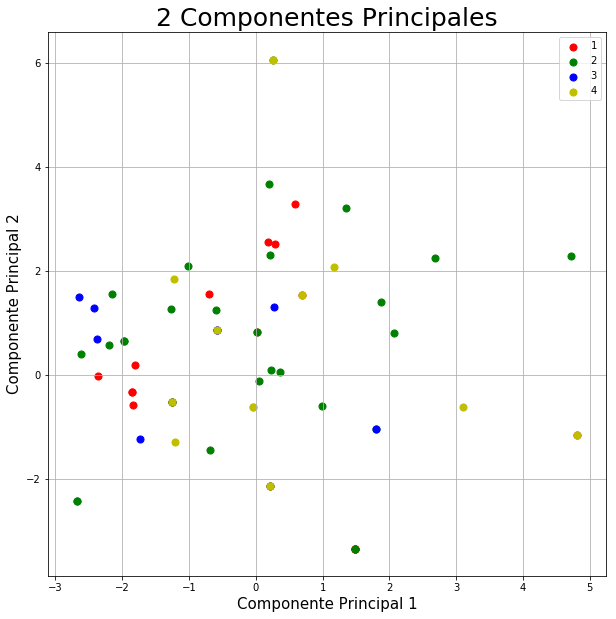

In [71]:
# Esta representación no es la de KMeans, sino la real sobre las dos dimensiones más significativas

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

comp_p = pca.fit_transform(datos_ml)
df_pca_2 = pd.DataFrame(data = comp_p, columns = ['Componente Principal 1', 'Componente Principal 2'])

df_pca_2 = pd.concat([df_pca_2, datos.iloc[:, 25]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 Componentes Principales', fontsize = 25)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_2.iloc[:, 2] == target
    ax.scatter(df_pca_2.loc[indicesToKeep, 'Componente Principal 1'], df_pca_2.loc[indicesToKeep, 'Componente Principal 2']
               ,c = color ,s = 50)
    
ax.legend(targets)
plt.savefig("Imágenes Obtenidas/Plot Kmeans Resampled.png")
ax.grid()

                                                                                        Deep Learning

In [297]:
from keras.models import Sequential
from keras.layers import Dense

# Inicialización del constructor
modelo = Sequential()

# Input
modelo.add(Dense(24, activation='relu', input_shape=(24,)))

# Oculta(s)
modelo.add(Dense(6, activation='relu'))
modelo.add(Dense(5, activation='relu'))
modelo.add(Dense(4, activation='relu'))

# Output 
modelo.add(Dense(4, activation='softmax'))

In [298]:
# Dimensiones de output del modelo
# modelo.output_shape

# Resumen del modelo
modelo.summary()

# Configuración del modelo
#modelo.get_config()

# Lista de los pesos
#modelo.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_156 (Dense)            (None, 6)                 150       
_________________________________________________________________
dense_157 (Dense)            (None, 5)                 35        
_________________________________________________________________
dense_158 (Dense)            (None, 4)                 24        
_________________________________________________________________
dense_159 (Dense)            (None, 4)                 20        
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [299]:
# Tengo que codificar el y_train y el y_test con onehot para obtener 4 dimensiones, que es lo que quiere la red

from pandas import get_dummies

dummy_ytrain = get_dummies(y_train)
dummy_ytest = get_dummies(y_test)

In [300]:
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model_dl = modelo.fit(x_train, dummy_ytrain, epochs=50, batch_size=1, verbose=0)

In [301]:
y_pred = modelo.predict(x_test)
y_pred

array([[4.32479754e-02, 4.11877828e-03, 1.03039984e-05, 9.52622950e-01],
       [7.19834259e-03, 1.90082181e-04, 9.92598534e-01, 1.30294484e-05],
       [2.34919846e-01, 4.70290840e-01, 1.00991145e-01, 1.93798110e-01],
       [1.03417570e-02, 6.24095492e-06, 9.89648938e-01, 3.02594344e-06],
       [7.40985124e-05, 9.50132668e-01, 2.56340377e-06, 4.97907251e-02],
       [7.19834259e-03, 1.90082181e-04, 9.92598534e-01, 1.30294484e-05],
       [9.19810832e-02, 8.13174620e-03, 6.76637137e-05, 8.99819553e-01],
       [2.22923188e-03, 5.39347006e-04, 1.41232110e-08, 9.97231424e-01],
       [7.85879269e-02, 7.59681821e-01, 6.89343214e-02, 9.27958712e-02],
       [1.03417570e-02, 6.24095492e-06, 9.89648938e-01, 3.02594344e-06],
       [1.09145969e-01, 9.48092993e-03, 1.04820596e-04, 8.81268322e-01],
       [5.50529221e-03, 7.79723048e-01, 2.74251186e-04, 2.14497417e-01],
       [1.16252907e-09, 9.99998212e-01, 1.45705610e-06, 3.69910396e-07],
       [7.10948229e-01, 2.91045960e-02, 1.60792977e

In [302]:
score = modelo.evaluate(x_train, dummy_ytrain, verbose=1)

print(score)

78/78 [==============================] - 0s 6ms/step
[0.09136077780754139, 0.964743585158617]


In [303]:
score = modelo.evaluate(x_test, dummy_ytest, verbose=1)

print(score)

27/27 [==============================] - 0s 0us/step
[0.22244924306869507, 0.9351851940155029]


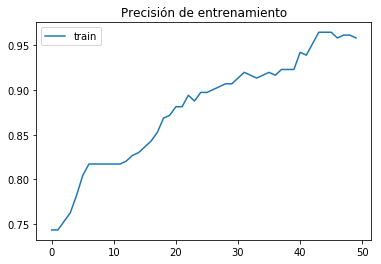

In [304]:
# Precisión en el entrenamiento

import matplotlib.pyplot as plt

plt.title('Precisión de entrenamiento')
plt.plot(model_dl.history['acc'], label='train')
plt.legend()
plt.savefig("Imágenes Obtenidas/Precisión Entrenamiento Deep Learning.png")
plt.show()